In [1]:
import pandas as pd

# Load the dataset
file_path = 'customer_agg.csv'
customer_agg = pd.read_csv(file_path)

# Display the first few rows of the dataset
customer_agg.head()


,customer_id,purchase_frequency,total_amount,recency,customer_lifetime,clv
0,C0100000111,6,882.97,80,281,882.97
1,C0100000199,3,597.00,73,191,597.00
2,C0100000343,6,700.94,24,308,700.94
3,C0100000375,4,223.98,65,289,223.98
4,C0100000392,32,626.12,25,327,626.12


In [5]:
from sklearn.model_selection import train_test_split
# Define features and target
X = customer_agg.drop(columns=['customer_id', 'clv'])
y = customer_agg['clv']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((48428, 4), (12107, 4), (48428,), (12107,))

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, rmse_rf, r2_rf


(0.05647147104987735, 1.4602044135318506, 0.9999819518823304)

In [8]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
r2_gb = r2_score(y_test, y_pred_gb)

mae_gb, rmse_gb, r2_gb


(2.2312382542432094, 3.6998490937657773, 0.9998841295691455)

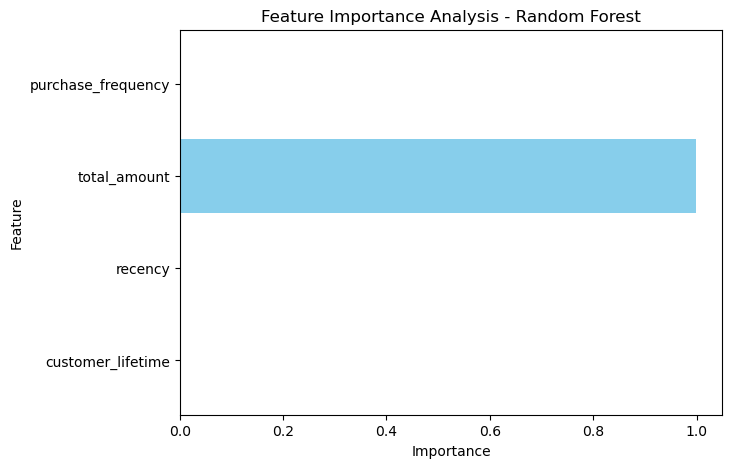

In [11]:
import matplotlib.pyplot as plt

# Plot feature importances using a horizontal bar chart
plt.figure(figsize=(7, 5))
plt.barh(np.arange(len(features)), feature_importances, align='center', color='skyblue')
plt.yticks(np.arange(len(features)), features)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis - Random Forest')
plt.gca().invert_yaxis()
plt.show()


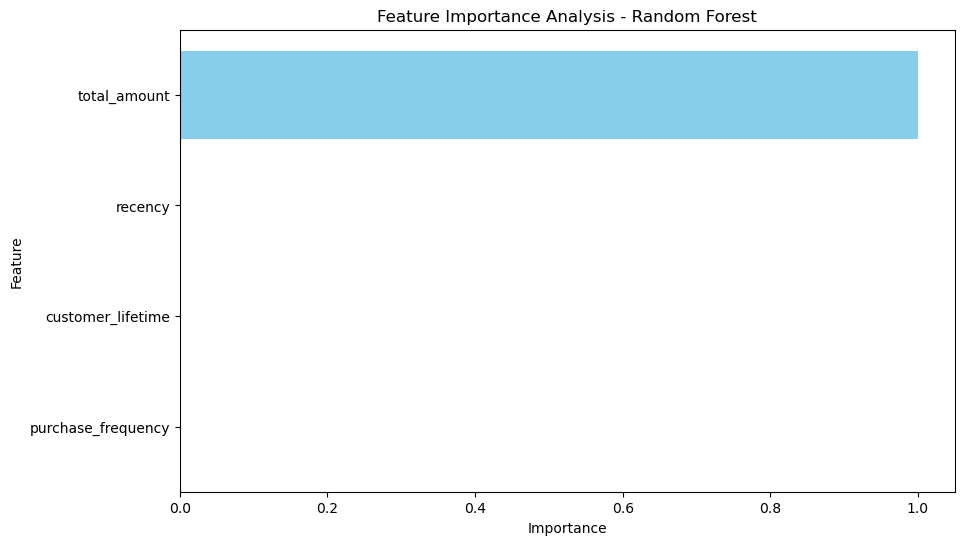

In [12]:
# Alternative approach to plot feature importance
import matplotlib.pyplot as plt

# Extract feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for easier plotting
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis - Random Forest')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


In [14]:
# Extract feature importances and feature names
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
feature_importance_df.head()

,Feature,Importance
1,total_amount,0.999839
2,recency,0.000074
3,customer_lifetime,0.000051
0,purchase_frequency,0.000036


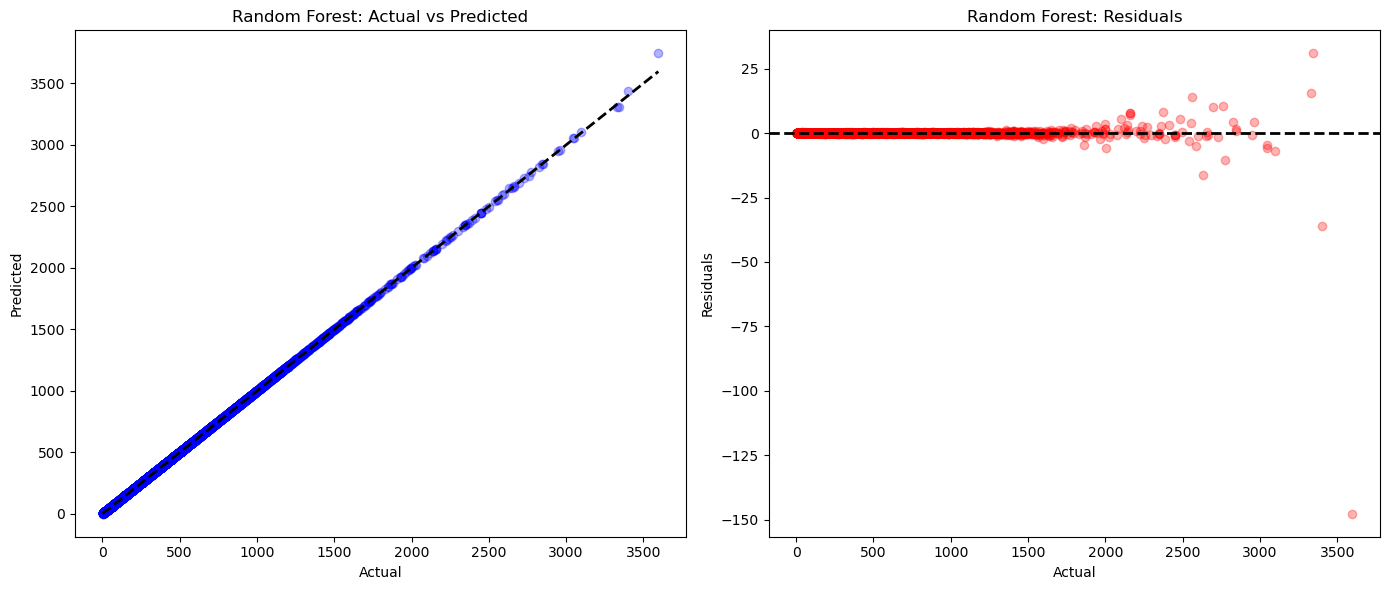

In [16]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs actual values
plt.figure(figsize=(14, 6))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs Predicted')

# Residual plot
plt.subplot(1, 2, 2)
residuals_rf = y_test - y_pred_rf
plt.scatter(y_test, residuals_rf, alpha=0.3, color='red')
plt.axhline(0, color='black', linestyle='--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Random Forest: Residuals')

plt.tight_layout()
plt.show()


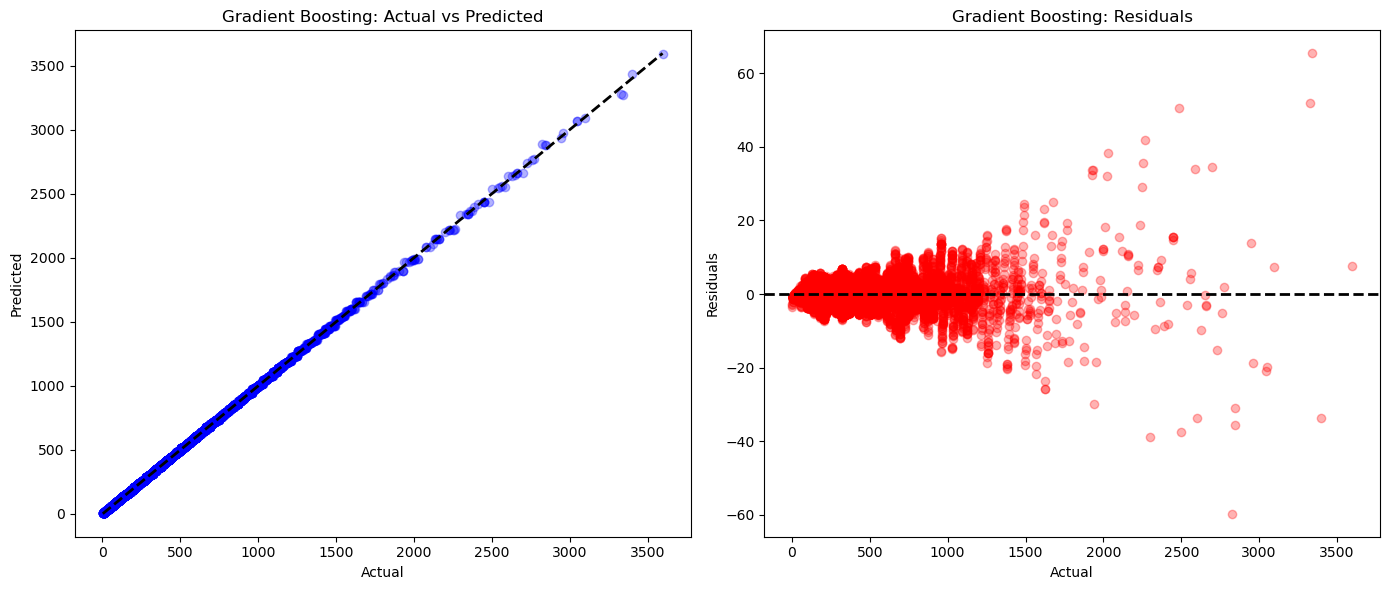

In [17]:
# Scatter plot of predicted vs actual values
plt.figure(figsize=(14, 6))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_gb, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting: Actual vs Predicted')

# Residual plot
plt.subplot(1, 2, 2)
residuals_gb = y_test - y_pred_gb
plt.scatter(y_test, residuals_gb, alpha=0.3, color='red')
plt.axhline(0, color='black', linestyle='--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Gradient Boosting: Residuals')

plt.tight_layout()
plt.show()
